In [1]:
import ReliabilityDiagram as rd
import numpy as np
import matplotlib.pyplot as pl

# Example 1

## Create case data

In [2]:
nobs = 5000   # number of events
nclim = 30    # number of years considered in climatology
nfc = 51      # ensemble size of the forecasts

In [3]:
clima = np.random.normal(loc=0,scale=10,size=(nobs,nclim))   # climatology (follows the same normal distribution for all events)
obs = np.random.normal(loc=0,scale=10,size=(nobs))           # observations drawn from the same distribution as climatology
fcast = np.random.normal(loc=obs+np.random.normal(loc=2,scale=5,size=(nobs)) ,scale=5,size=(nfc,nobs)).T   # forecasts (also generated by a normal distribution 
                                                                                                           # s.t. ensemble mean = observations + bias + noise)    

## Compute contingency table and forecast attributes

In [4]:
data = rd.ReliabilityDiagram(obs,fcast,clima,0,1/4,closed_ends='both',nbins=10)  # example for lower quartile

In [5]:
c_table = data.contingency_table()    # contingency table
c_table

array([[  69., 2846.],
       [  56.,  288.],
       [  83.,  174.],
       [  76.,  112.],
       [  89.,   85.],
       [  92.,   64.],
       [ 108.,   44.],
       [ 101.,   40.],
       [ 137.,   27.],
       [ 484.,   25.]])

In [6]:
bs, rel, res = data.forecast_attributes()
print(bs, rel, res)

0.08378799999999999 0.003151037068348895 0.11128203706834891


## Plot reliability diagram

In [7]:
# Compute needed elements for diagram
yi = data.bins  # both have the same bins for the forecast probabilities
oi= data.observed_frequency()
ci_low, ci_upp = data.confidence_intervals()
wti = np.sum(c_table,axis=1)/np.sum(c_table) 

In [8]:
# Elements for plot
xd = yd = [0,1]
q = data.ub - data.lb
clim_x = clim_y = [q,q]
sk_line = [q/2,(1-q)/2+q]

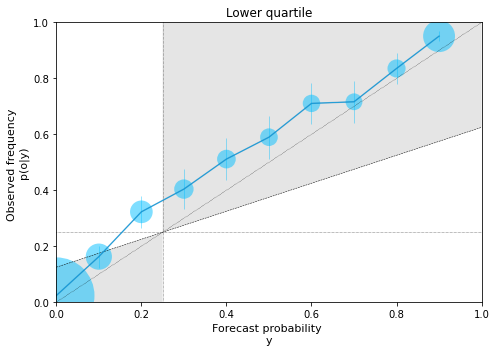

In [9]:
# Plot
# (in this example, the lower quartile is underforecasted)
fig = pl.figure(figsize=(7,5))
pl.plot(xd,yd,color='black',linestyle=':',linewidth=0.5)
pl.plot(xd,clim_y,color='black',linestyle=':',linewidth=0.5)
pl.plot(clim_x,yd,color='black',linestyle=':',linewidth=0.5)
pl.plot(xd,sk_line,color='black',linestyle='--',linewidth=0.5)
pl.fill_between(xd,xd,sk_line,facecolor='grey',alpha=0.2)
pl.fill_betweenx(yd,yd,clim_x,facecolor='grey',alpha=0.2)
pl.scatter(yi,oi,s=wti*10000,color='deepskyblue',marker='o',alpha=0.5,edgecolors='none')
pl.plot(yi,oi,color='deepskyblue',linestyle='-',linewidth=0.8)
pl.errorbar(yi,oi,yerr=[oi - ci_low, ci_upp - oi],ecolor='deepskyblue',elinewidth=0.8,alpha=0.5)
pl.ylim(0.0,1.0)
pl.xlim(0.0,1.0)
pl.ylabel('Observed frequency \np(o|y)',fontsize=11)
pl.xlabel('Forecast probability \ny',fontsize=11)
pl.title("Lower quartile")
pl.tight_layout()

# Example 2

In [10]:
fcast2 = np.random.normal(loc=obs+np.random.normal(loc=0,scale=3,size=(nobs)) ,scale=5,size=(nfc,nobs)).T   

In [11]:
data_lt = rd.ReliabilityDiagram(obs,fcast2,clima,0,1/3,closed_ends='both',nbins=10)  # example for the lower tercile
data_ut = rd.ReliabilityDiagram(obs,fcast2,clima,2/3,1,closed_ends='both',nbins=10)  # example for the upper tercile

## Plot reliability diagram

In [12]:
# Compute needed elements for diagram
c_table_lt = data_lt.contingency_table()
wti_lt = np.sum(c_table_lt,axis=1)/np.sum(c_table_lt) 
oi_lt = data_lt.observed_frequency()
ci_low_lt, ci_upp_lt = data_lt.confidence_intervals()

c_table_ut = data_ut.contingency_table()
wti_ut = np.sum(c_table_ut,axis=1)/np.sum(c_table_ut) 
oi_ut = data_ut.observed_frequency()
ci_low_ut, ci_upp_ut = data_ut.confidence_intervals()

In [13]:
# Other elements for plot
xd = yd = [0,1]
q = 1/3   # tercile
clim_x = clim_y = [q,q]
sk_line = [q/2,(1-q)/2+q]

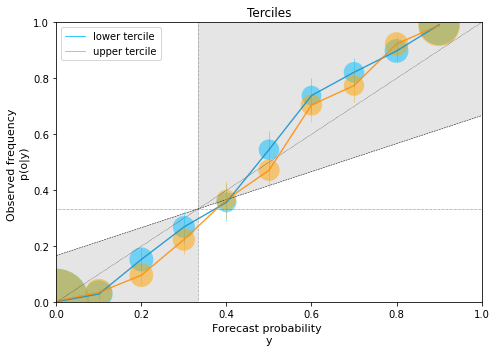

In [14]:
# Plot
# (in this example, the model is inderconfident)
fig = pl.figure(figsize=(7,5))
pl.plot(xd,yd,color='black',linestyle=':',linewidth=0.5)
pl.plot(xd,clim_y,color='black',linestyle=':',linewidth=0.5)
pl.plot(clim_x,yd,color='black',linestyle=':',linewidth=0.5)
pl.plot(xd,sk_line,color='black',linestyle='--',linewidth=0.5)
pl.fill_between(xd,xd,sk_line,facecolor='grey',alpha=0.2)
pl.fill_betweenx(yd,yd,clim_x,facecolor='grey',alpha=0.2)
pl.scatter(data_lt.bins,oi_lt,s=wti_lt*10000,color='deepskyblue',marker='o',alpha=0.5,edgecolors='none')
pl.plot(data_lt.bins,oi_lt,color='deepskyblue',linestyle='-',linewidth=0.8, label="lower tercile")
pl.errorbar(data_lt.bins,oi_lt,yerr=[oi_lt - ci_low_lt, ci_upp_lt - oi_lt],ecolor='deepskyblue',elinewidth=0.8,alpha=0.5)
pl.scatter(data_ut.bins,oi_ut,s=wti_ut*10000,color='orange',marker='o',alpha=0.5,edgecolors='none')
pl.plot(data_ut.bins,oi_ut,color='orange',linestyle='-',linewidth=0.8, label="upper tercile")
pl.errorbar(data_ut.bins,oi_ut,yerr=[oi_ut - ci_low_ut, ci_upp_ut - oi_ut],ecolor='orange',elinewidth=0.8,alpha=0.5)
pl.ylim(0.0,1.0)
pl.xlim(0.0,1.0)
pl.legend()
pl.ylabel('Observed frequency \np(o|y)',fontsize=11)
pl.xlabel('Forecast probability \ny',fontsize=11)
pl.title("Terciles")
pl.tight_layout()